In [2]:
import numpy as np
import matplotlib.pyplot as plt

(array([2.14020581e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.14020581e-04, 4.28041162e-04, 1.07010290e-03, 2.14020581e-04,
        1.49814407e-03, 1.28412349e-03, 2.35422639e-03, 2.56824697e-03,
        3.85237046e-03, 4.70845278e-03, 9.63092614e-03, 1.41253583e-02,
        1.64795847e-02, 2.97488607e-02, 2.95348402e-02, 3.76676222e-02,
        4.90107130e-02, 7.06267917e-02, 8.43241088e-02, 1.11076681e-01,
        1.34618945e-01, 1.55806983e-01, 1.89836255e-01, 2.06315840e-01,
        2.36706762e-01, 2.76514590e-01, 2.83577270e-01, 3.13540151e-01,
        3.59982617e-01, 3.68115399e-01, 3.88661375e-01, 4.18410236e-01,
        3.92299725e-01, 3.87377251e-01, 3.79244469e-01, 3.85023025e-01,
        3.59554576e-01, 3.29591694e-01, 3.13968192e-01, 2.76942632e-01,
        2.48049853e-01, 2.14876663e-01, 1.88338111e-01, 1.62441621e-01,
        1.41681625e-01, 1.10434620e-01, 9.69513231e-02, 7.94016355e-02,
        5.77855568e-02, 4.70845278e-02, 3.72395811e-02, 2.996288

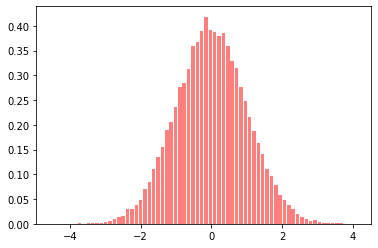

In [7]:
# ex1
def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)
def laplace(x, alpha):
    return (alpha/2)*np.exp(-alpha*np.abs(x))

alpha = 1
M = np.sqrt(2*np.exp(1)/np.pi)
samples = []
for i in range(50000):
    x_proposed = np.random.laplace(0, 1/alpha)
    u = np.random.uniform()
    if u <= normal(x_proposed) / (M*laplace(x_proposed, alpha)):
        samples.append(x_proposed)

plt.hist(samples, bins=70, density=True, rwidth=0.8, color='r', alpha=0.5)

In [8]:
print("1/M:", 1/M, "\nempirical acceptance:", len(samples)/50000)

1/M: 0.7601734505331403 
empirical acceptance: 0.75754


(array([0.02689396, 0.05855038, 0.10673539, 0.18041362, 0.2779042 ,
        0.3384156 , 0.39080279, 0.40565049, 0.34597953, 0.26809912,
        0.17621144, 0.11766105, 0.06499373, 0.02689396, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10925669, 0.23420153, 0.43618634, 0.76255569,
        1.11637929, 1.36598881, 1.56181042, 1.5906654 , 1.37999608,
        1.0855633 , 0.76283584, 0.46336044, 0.24652792, 0.10673539]),
 array([-2.49814000e+00, -2.42674849e+00, -2.3

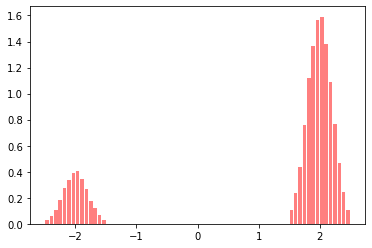

In [14]:
def trunc_guassian(mu, sigma, a, n=1):
    samples = []
    while len(samples) != n:
        x = np.random.normal(mu, sigma)
        if mu-a<x<mu+a:
            samples.append(x)
    return samples

def discrete_sampler(weights, u):
    cdf = np.cumsum(weights)
    for i in range(len(cdf)):
        if u <= cdf[i]:
            return i

w = [0.8, 0.2]
mu = [2, -2]
sigma = [0.2, 0.2]
a = [0.5, 0.5]

samples = []
for i in range(50000):
    u = np.random.uniform(0, 1)
    ind = discrete_sampler(w, u)
    samples.append(trunc_guassian(mu[ind], sigma[ind], a[ind])[0])
plt.hist(samples, bins=70, density=True, rwidth=0.8, color='r', alpha=0.5)

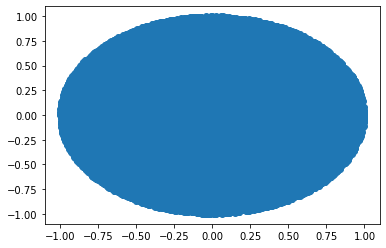

In [22]:
# ex3
samples1 = []
samples2 = []
for i in range(50000):
    x = np.random.uniform(-1, 1, size=2)
    if x[0]**2 + x[1]**2 <= 1:
        samples1.append(x[0])
        samples2.append(x[1])
plt.scatter(samples1, samples2)

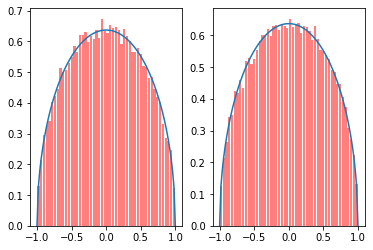

In [24]:
plt.subplot(1, 2, 1)
x = np.linspace(-1, 1, 100)
y = 2*np.sqrt(1-x**2) / np.pi
plt.hist(samples1, bins=50, density=True, rwidth=0.8, color='r', alpha=0.5)
plt.plot(x, y)

plt.subplot(1, 2, 2)
plt.hist(samples2, bins=50, density=True, rwidth=0.8, color='r', alpha=0.5)
plt.plot(x, y)